In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
#这行和下一行是解决图形标签无法显示中文的问题
plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 异常值分析
# （1）3σ原则：如果数据服从正态分布，异常值被定义为一组测定值中与平均值的偏差超过3倍的值 → p(|x - μ| > 3σ) ≤ 0.003
# 创建数据
data = pd.Series(np.random.randn(10000)*100)
print(data.head())

# 正态性检验
u = data.mean()  # 计算均值
std = data.std()  # 计算标准差
stats.kstest(data, 'norm', (u, std)) #正态分布的方式，得到 KstestResult(statistic=0.012627414595288711, pvalue=0.082417721086262413)，P值>0.5
print('均值为：%.3f，标准差为：%.3f' % (u,std))
print('------')

0     -8.371415
1    -56.260761
2    195.124954
3    -68.220410
4   -191.182059
dtype: float64
均值为：2.165，标准差为：99.238
------


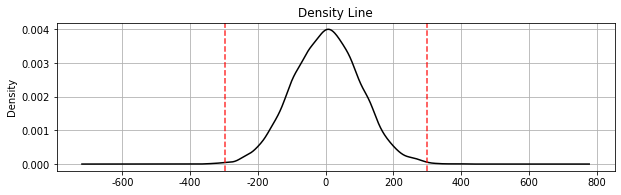

In [5]:
# 绘制数据密度曲线
fig = plt.figure(figsize = (10,6))
ax1 = fig.add_subplot(2,1,1)
data.plot(kind = 'kde',grid = True,style = '-k',title = 'Density Line')
#plt.axvline(3*std,hold=None,color='r',linestyle="--",alpha=0.8) #3倍的标准差
plt.axvline(3*std,color='r',linestyle="--",alpha=0.8) #3倍的标准差
plt.axvline(-3*std,color='r',linestyle="--",alpha=0.8)


异常值共28条


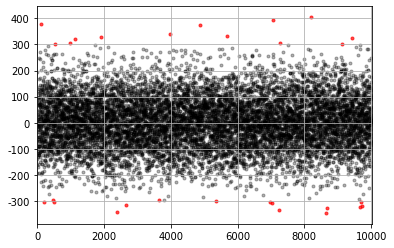

In [6]:
#输出异常信息
error = data[np.abs(data - u) > 3*std]  #超过3倍差的数据（即异常值）筛选出来
data_c = data[np.abs(data - u) < 3*std]
print('异常值共%i条' % len(error))
ax2 = fig.add_subplot(2, 1, 2)

# 图表表达
plt.scatter(data_c.index, data_c, color = 'k', marker = '.', alpha = 0.3)
plt.scatter(error.index, error, color = 'r', marker = '.', alpha = 0.7)
plt.xlim([-10,10010])
plt.grid()
plt.show()